Dataset loaded successfully.
Initial dataset shape: (1000, 11)


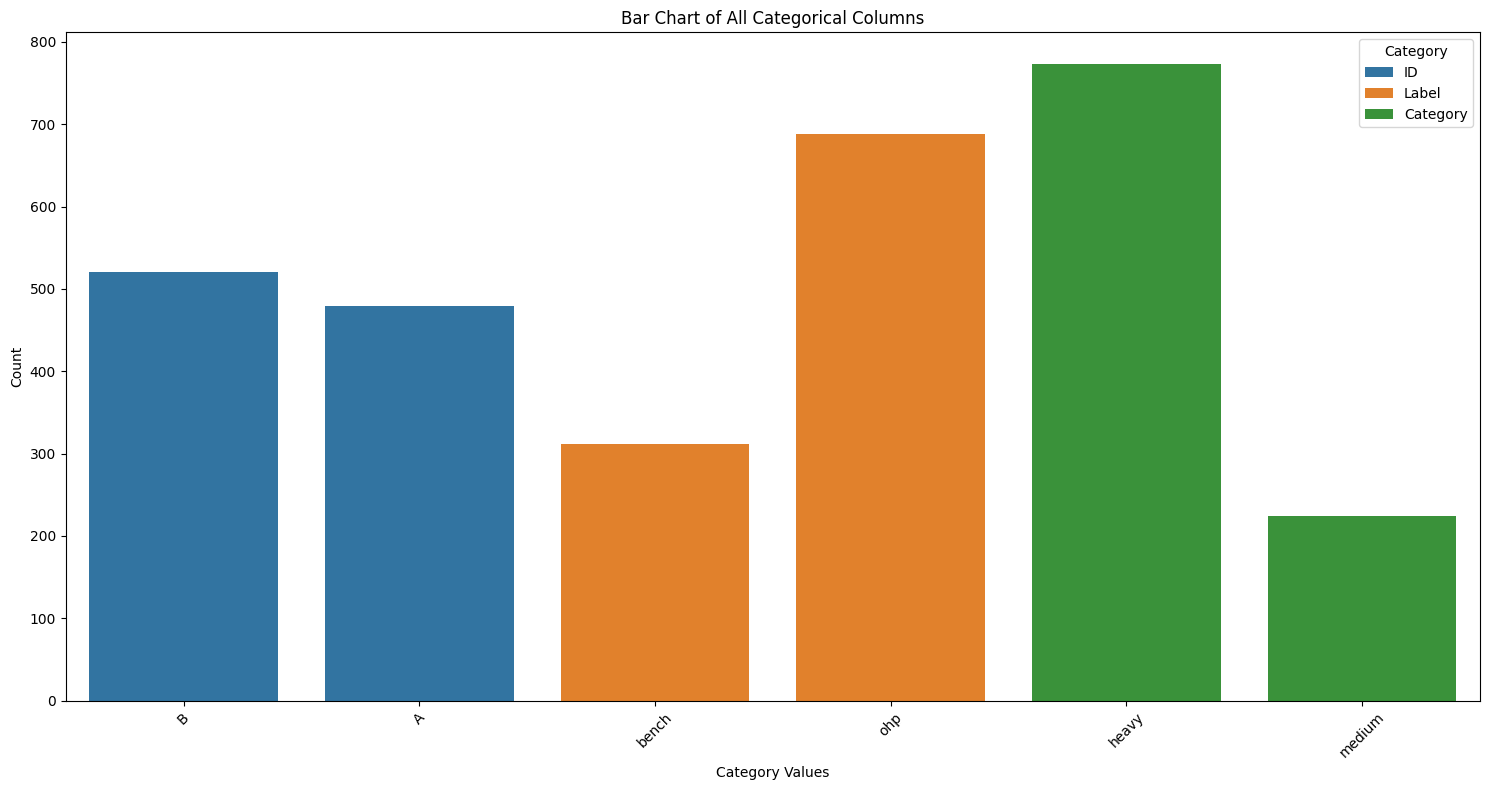

Shape after processing 'Acc_x': (1000, 11)
Discretization complete for 'Acc_x'.


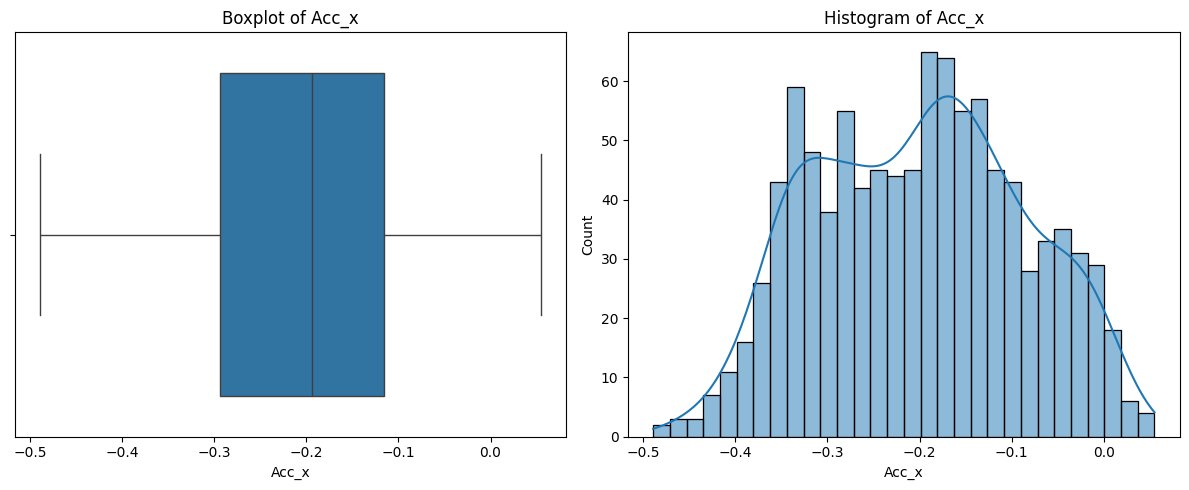

Normalization complete for 'Acc_x'.


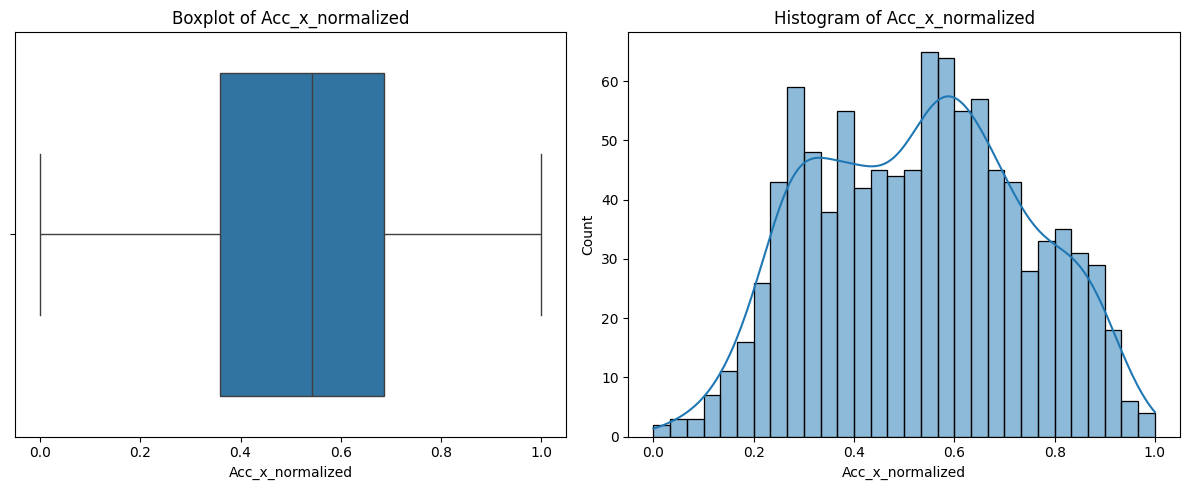

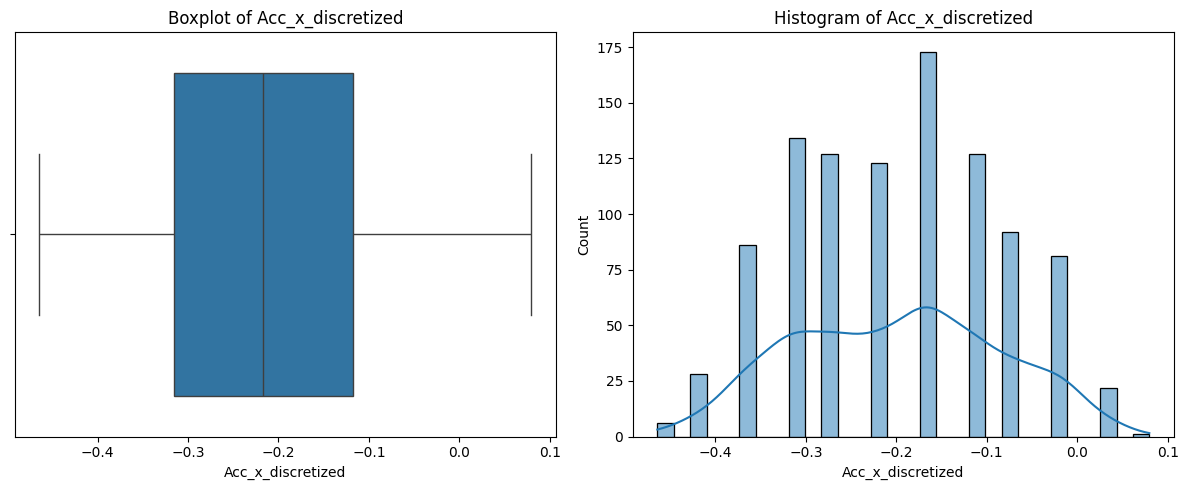

Dropped 113 non-numeric rows from 'Acc_y'.
Shape after processing 'Acc_y': (887, 13)
Discretization complete for 'Acc_y'.


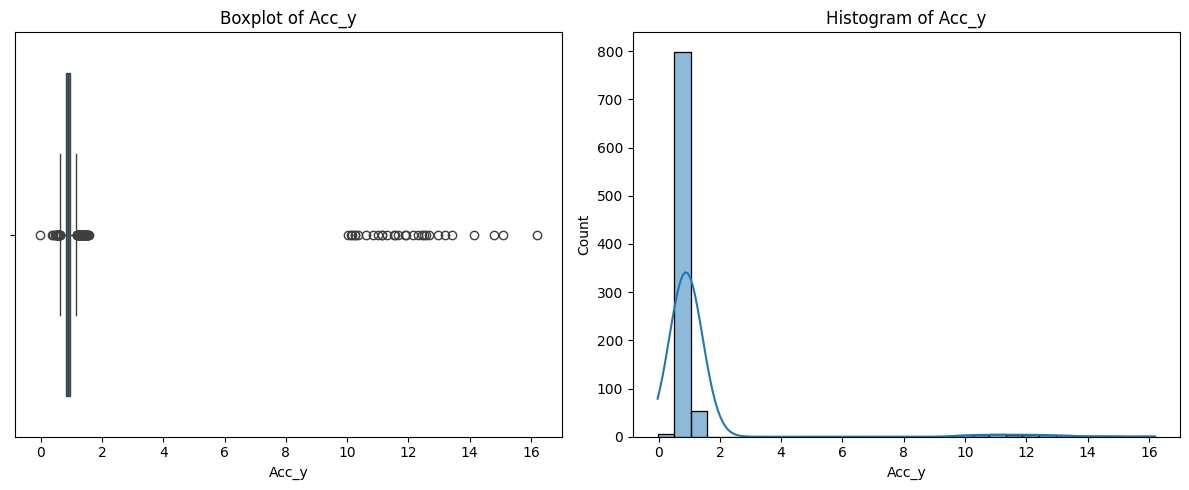

Normalization complete for 'Acc_y'.


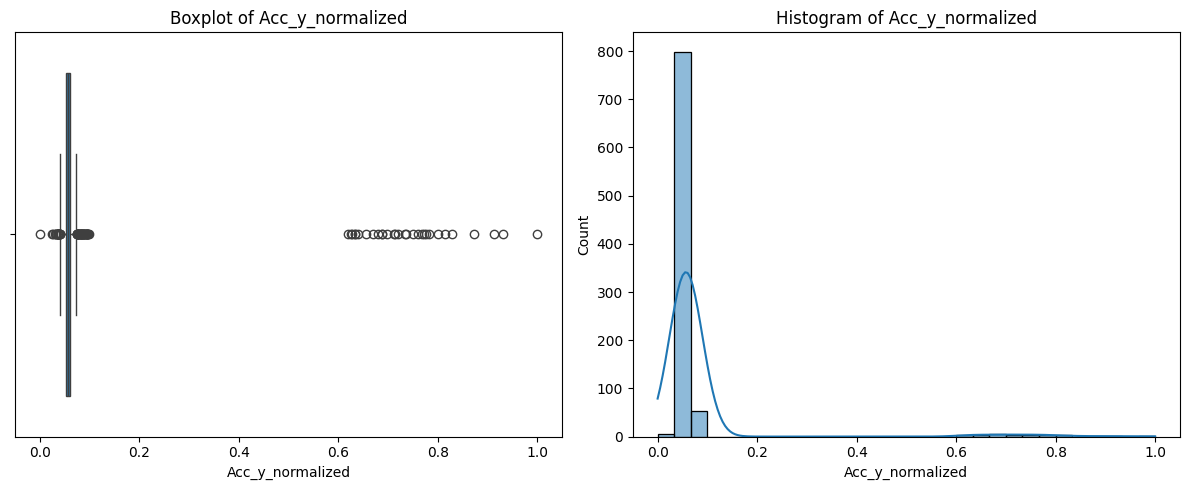

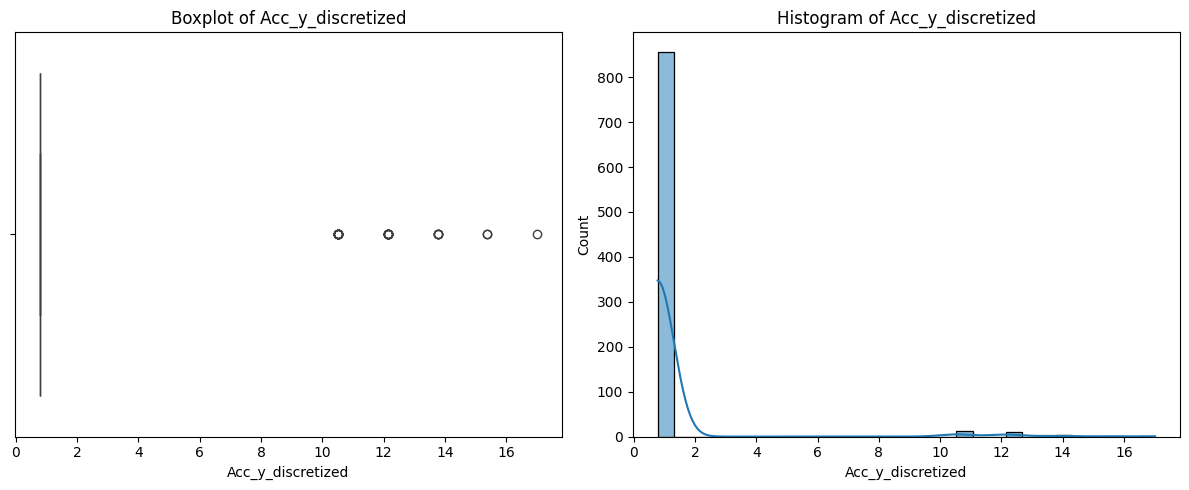

Shape after processing 'Acc_z': (887, 15)
Discretization complete for 'Acc_z'.


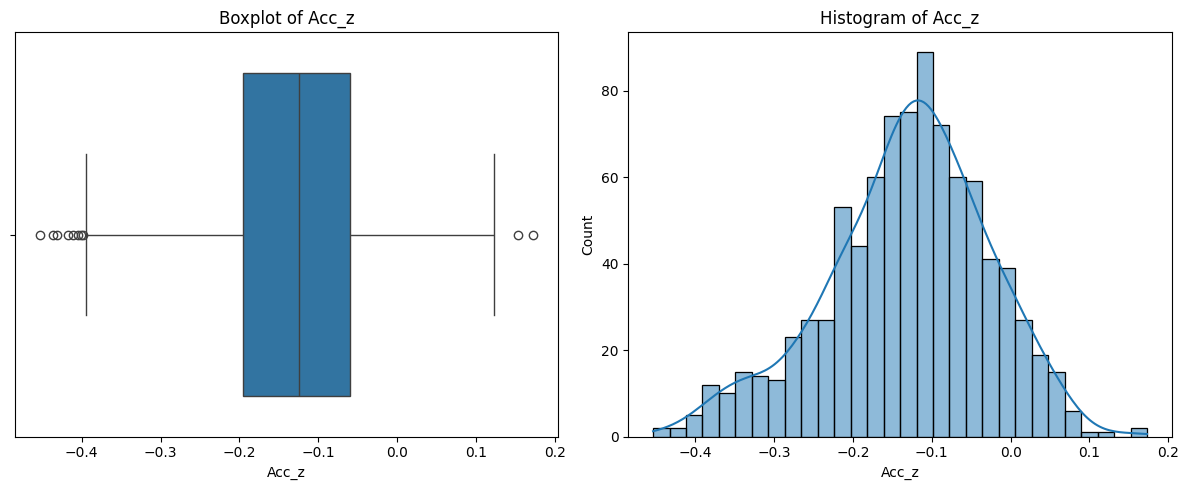

Normalization complete for 'Acc_z'.


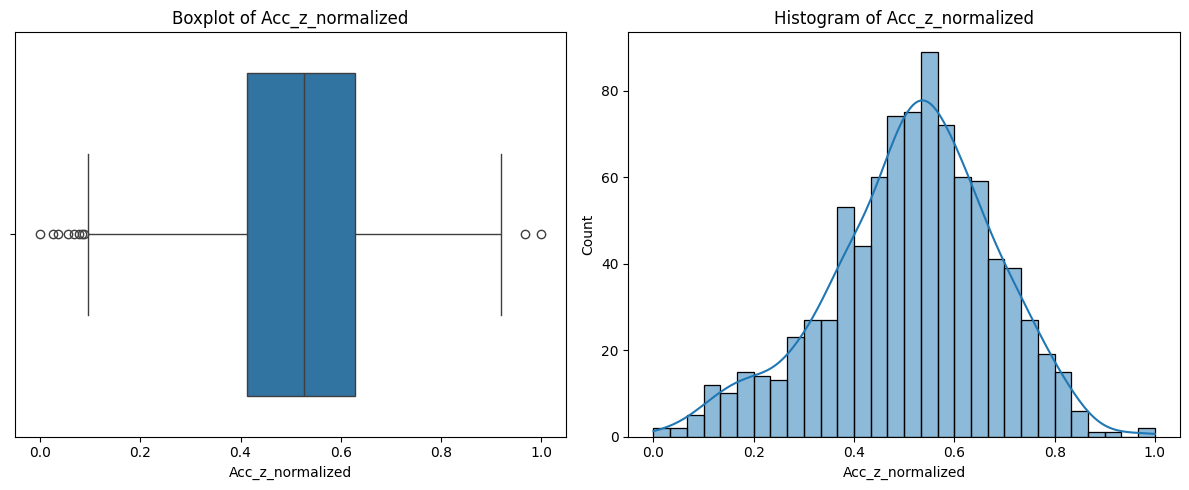

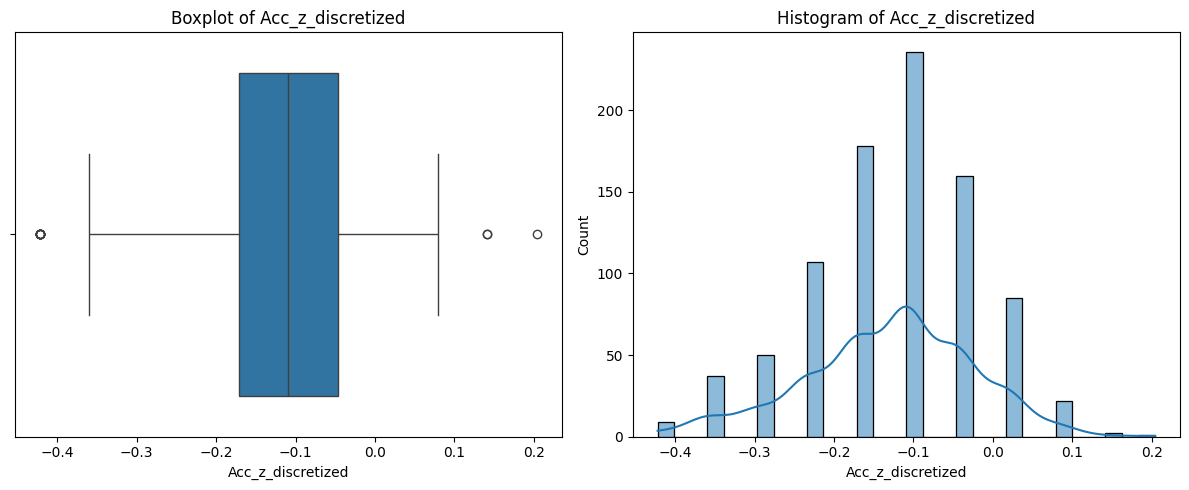

Dropped 154 non-numeric rows from 'Gyro_x'.
Shape after processing 'Gyro_x': (733, 17)
Discretization complete for 'Gyro_x'.


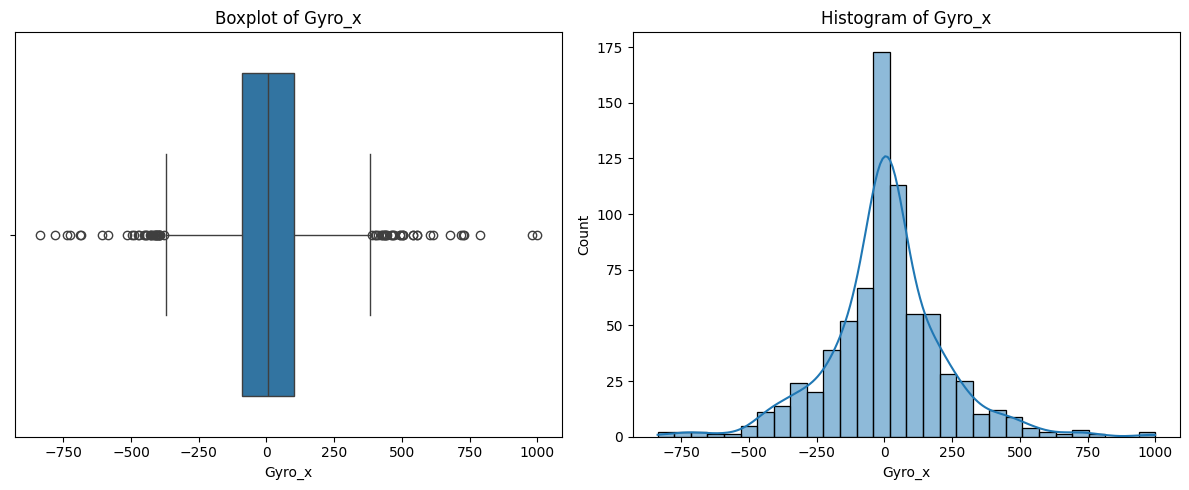

Normalization complete for 'Gyro_x'.


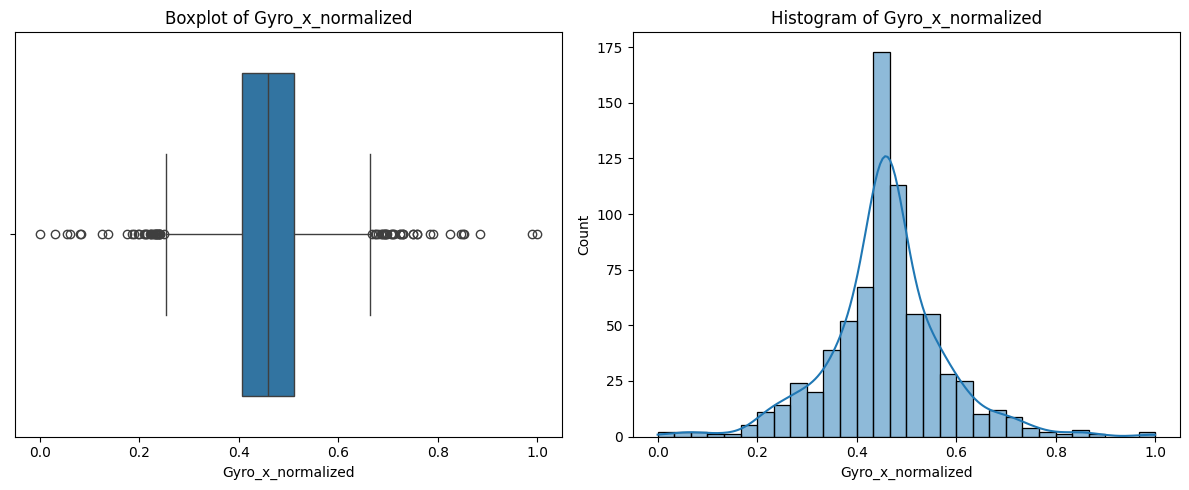

KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(file_path):
    data = pd.read_csv(file_path, delimiter=';', decimal='.', na_values=['NaN', 'NA', '', ' '], low_memory=False, nrows=1000)
    print("Dataset loaded successfully.")
    print(f"Initial dataset shape: {data.shape}")
    return data

# Convert column to numeric and handle non-numeric values
def prepare_numeric_column(data, column_name):
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
    initial_shape = data.shape[0]
    data = data.dropna(subset=[column_name]).reset_index(drop=True)
    dropped_rows = initial_shape - data.shape[0]
    
    if dropped_rows > 0:
        print(f"Dropped {dropped_rows} non-numeric rows from '{column_name}'.")
    
    print(f"Shape after processing '{column_name}': {data.shape}")
    return data

# Discretize values using equal-width intervals
def equal_width_discretization(data, column_name):
    n = data[column_name].shape[0]
    K = int(1 + (10 / 3) * math.log10(n))
    
    min_value = data[column_name].min()
    max_value = data[column_name].max()
    interval_width = (max_value - min_value) / K
    
    discretized_values = []
    for value in data[column_name]:
        interval_number = int((value - min_value) / interval_width)
        interval_midpoint = min_value + (interval_number + 0.5) * interval_width
        discretized_values.append(interval_midpoint)
    
    data[f"{column_name}_discretized"] = discretized_values
    print(f"Discretization complete for '{column_name}'.")
    return data

# Normalize values using Min-Max Normalization
def min_max_normalization(data, column_name, new_min=0, new_max=1):
    old_min = data[column_name].min()
    old_max = data[column_name].max()
    
    normalized_values = []
    for value in data[column_name]:
        new_value = ((value - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
        normalized_values.append(new_value)
    
    data[f"{column_name}_normalized"] = normalized_values
    print(f"Normalization complete for '{column_name}'.")
    return data

# Plot boxplot and histogram for a column
def plot_box_and_hist(data, column_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column_name])
    plt.title(f'Boxplot of {column_name}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name], bins=30, kde=True)
    plt.title(f'Histogram of {column_name}')

    plt.tight_layout()
    plt.show()

# Plot bar chart for all categorical columns in one graph
def plot_bar_chart_for_categorical(data, numeric_columns):
    # Select only non-numeric columns and exclude specific known numeric columns
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and col not in numeric_columns]
    
    # Melt the DataFrame to a long format with 'variable' and 'value' columns
    melted_data = data[categorical_columns].melt(var_name='Category', value_name='Value')
    
    # Plot the count of each category value with hue for different columns
    plt.figure(figsize=(15, 8))
    sns.countplot(data=melted_data, x='Value', hue='Category')
    
    # Adjust plot aesthetics
    plt.xticks(rotation=45)
    plt.title('Bar Chart of All Categorical Columns')
    plt.xlabel('Category Values')
    plt.ylabel('Count')
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()

# Plot scatter plots for each pair of numeric columns
def plot_scatter_matrix(data, columns):
    sns.pairplot(data[columns], kind="scatter", diag_kind="kde")
    plt.suptitle("Scatter Matrix for Numeric Columns", y=1.02)  # Adjust y for better title positioning
    plt.show()



def main():
    file_path = r'D:\M2\DataMining\TP1\DatasetExos.csv'
    data = load_dataset(file_path)
    
    # List of columns to process
    columns_to_process = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z']
    
    columns_to_process2 = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyro_x', 'Gyro_y', 'Gyro_z', 'ep (ms)']
    
    # Visualize categorical columns with bar charts, excluding numeric columns
    plot_bar_chart_for_categorical(data, columns_to_process2)

    for column in columns_to_process:
        data = prepare_numeric_column(data, column)
        data = equal_width_discretization(data, column)
        
        # Plot original, normalized, and discretized values
        plot_box_and_hist(data, column)
        data = min_max_normalization(data, column)
        plot_box_and_hist(data, f"{column}_normalized")
        plot_box_and_hist(data, f"{column}_discretized")
    

    plot_scatter_matrix(data, columns_to_process)
    
    print("Final processed data:")
    print(data.head())


if __name__ == "__main__":
    main()
